C:\Users\oliver.koehn\AppData\Local\Temp\ipykernel_28040\558511926.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start='2023-01-01', end='2023-01-31', freq='H')


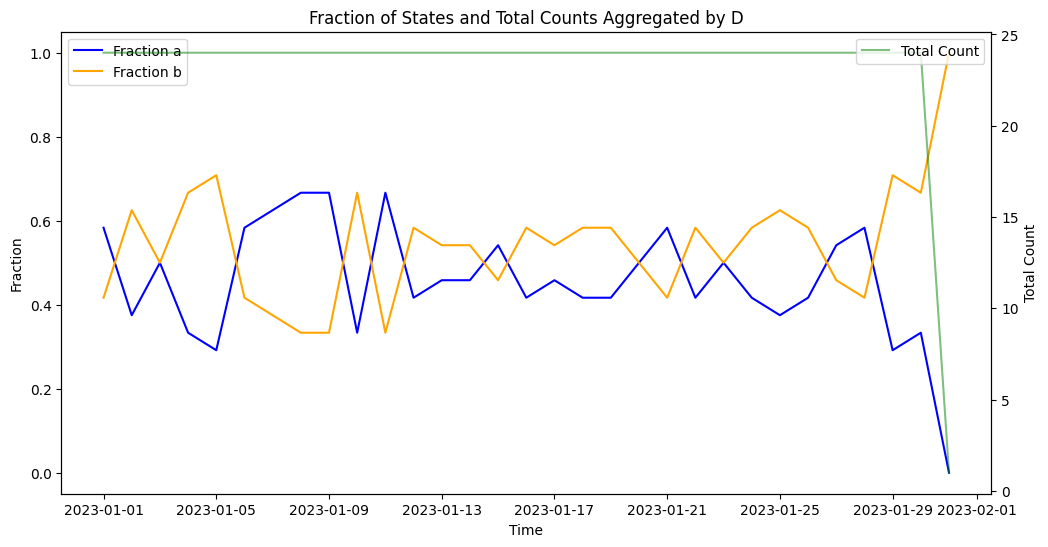

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a synthetic dataset
np.random.seed(42)
date_range = pd.date_range(start='2023-01-01', end='2023-01-31', freq='H')
states = np.random.choice(['a', 'b'], size=len(date_range))

# Create DataFrame
data = pd.DataFrame({'timestamp': date_range, 'state': states})

data.head()


def aggregate_and_plot(data, freq='D'):
    # Resample data
    resampled = data.resample(freq, on='timestamp').state.value_counts().unstack(fill_value=0)
    resampled['total'] = resampled.sum(axis=1)
    resampled['fraction_a'] = resampled['a'] / resampled['total']
    resampled['fraction_b'] = resampled['b'] / resampled['total']

    # Plotting
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot fraction of state 'a' and 'b'
    ax1.plot(resampled.index, resampled['fraction_a'], label='Fraction a', color='blue')
    ax1.plot(resampled.index, resampled['fraction_b'], label='Fraction b', color='orange')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Fraction')
    ax1.legend(loc='upper left')

    # Plot total count on secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(resampled.index, resampled['total'], label='Total Count', color='green', alpha=0.5)
    ax2.set_ylabel('Total Count')
    ax2.legend(loc='upper right')

    plt.title(f'Fraction of States and Total Counts Aggregated by {freq}')
    plt.show()

# Aggregate by day as an example
aggregate_and_plot(data, freq='D')
